# Sales Data Analysis

This notebook focuses on analysing and visualising sales data. Here's a breakdown of the steps involved:

1.   **Generate dummy data:** We'll start by creating synthetic sales data, including customer IDs, purchase IDs, purchase amounts, the number of devices purchased, and add-on sales amounts. This dummy data will mimic real sales data to demonstrate analysis techniques.

2.   **Export the data:** The dummy data will be saved as a CSV file, which can then be used to create visualizations and dashboards in Power BI.

3.   **Get insights:** We'll perform data analysis on the dummy data to extract meaningful insights. This includes calculating key metrics such as the total purchase amount, the number of devices purchased, the average device price per quarter etc.

4.   **Visualise findings:** Finally, we'll create various visualizations to represent the insights derived from the analysis.



### Loading libraries

In [60]:
# for data processing and analysis
import pandas as pd
import numpy as np

# for visualisations
import plotly.express as px
import plotly.graph_objects as go

# for uploading & displaying graphs as still images
from google.colab import files
from IPython.display import Image, display

### Generating dummy data

In [45]:
# Generate dummy data
np.random.seed(42)
data = {
    'CustomerID': np.random.randint(1, 101, 500),
    'PurchaseID': np.random.randint(1000, 2000, 500),
    'PurchaseAmount': np.random.uniform(100, 2000, 500),
    'DevicesPurchased': np.random.randint(1, 5, 500),
    'AddedSalesAmount': np.random.uniform(0, 500, 500)
}

# Create dataframe
df = pd.DataFrame(data)

# Introduce zeros in the AddedSalesAmount column (50%)
num_zeros_added_sales = int(0.5 * len(df))
zero_indices_added_sales = np.random.choice(df.index, num_zeros_added_sales, replace=False)
df.loc[zero_indices_added_sales, 'AddedSalesAmount'] = 0

# Introduce zeros in PurchaseAmount and DevicesPurchased columns (20%)
num_zeros_purchase = int(0.2 * len(df))
zero_indices_purchase = np.random.choice(df.index, num_zeros_purchase, replace=False)
df.loc[zero_indices_purchase, 'PurchaseAmount'] = 0
df.loc[zero_indices_purchase, 'DevicesPurchased'] = 0

# Ensure AddedSalesAmount is not zero when PurchaseAmount and DevicesPurchased are zero
df.loc[zero_indices_purchase, 'AddedSalesAmount'] = df.loc[zero_indices_purchase, 'AddedSalesAmount'].apply(lambda x: x if x != 0 else np.random.uniform(1, 500))

# Generate dummy date data
df['PurchaseDate'] = pd.date_range(start='2023-01-01', end='2023-12-31', periods=len(df))

In [46]:
# Add additional data: Total Amount, Average Device Amount
df['TotalAmount'] = df['PurchaseAmount'] + df['AddedSalesAmount']
df['AvgDeviceAmount'] = df['PurchaseAmount'] / df['DevicesPurchased']

In [47]:
df.head()

,CustomerID,PurchaseID,PurchaseAmount,DevicesPurchased,AddedSalesAmount,PurchaseDate,TotalAmount,AvgDeviceAmount
0,52,1075,556.276676,3,0.000000,2023-01-01 00:00:00.000000000,556.276676,185.425559
1,93,1153,244.140323,2,0.000000,2023-01-01 17:30:25.250501002,244.140323,122.070162
2,15,1655,344.871472,1,340.114121,2023-01-02 11:00:50.501002004,684.985593,344.871472
3,72,1434,343.287094,2,36.099204,2023-01-03 04:31:15.751503006,379.386299,171.643547
4,61,1996,0.000000,0,77.012465,2023-01-03 22:01:41.002004008,77.012465,NaN


In [48]:
df.tail()

,CustomerID,PurchaseID,PurchaseAmount,DevicesPurchased,AddedSalesAmount,PurchaseDate,TotalAmount,AvgDeviceAmount
495,63,1449,1594.055527,1,489.985165,2023-12-28 01:58:18.997995992,2084.040692,1594.055527
496,69,1204,269.880904,4,300.940795,2023-12-28 19:28:44.248496996,570.821699,67.470226
497,22,1125,0.000000,0,106.345123,2023-12-29 12:59:09.498997996,106.345123,NaN
498,93,1746,1770.324784,1,0.000000,2023-12-30 06:29:34.749499000,1770.324784,1770.324784
499,67,1042,1894.990842,3,0.000000,2023-12-31 00:00:00.000000000,1894.990842,631.663614


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        500 non-null    int64         
 1   PurchaseID        500 non-null    int64         
 2   PurchaseAmount    500 non-null    float64       
 3   DevicesPurchased  500 non-null    int64         
 4   AddedSalesAmount  500 non-null    float64       
 5   PurchaseDate      500 non-null    datetime64[ns]
 6   TotalAmount       500 non-null    float64       
 7   AvgDeviceAmount   400 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 31.4 KB


In [50]:
df.describe()

,CustomerID,PurchaseID,PurchaseAmount,DevicesPurchased,AddedSalesAmount,PurchaseDate,TotalAmount,AvgDeviceAmount
count,500.00000,500.000000,500.000000,500.000000,500.000000,500,500.000000,400.000000
mean,49.87400,1492.542000,815.024917,1.990000,145.883528,2023-07-02 00:00:00,960.908445,537.968065
min,1.00000,1000.000000,0.000000,0.000000,0.000000,2023-01-01 00:00:00,2.156456,31.175914
25%,24.00000,1222.750000,224.679073,1.000000,0.000000,2023-04-02 00:00:00,403.778941,219.411226
50%,51.00000,1485.000000,770.067274,2.000000,74.732743,2023-07-02 00:00:00,905.714530,423.101436
75%,73.25000,1757.250000,1354.146869,3.000000,289.005833,2023-10-01 00:00:00,1451.401807,712.611349
max,100.00000,1998.000000,1996.074810,4.000000,498.348427,2023-12-31 00:00:00,2446.398789,1974.378973
std,29.56983,293.509932,632.321939,1.426172,162.010968,NaN,626.993299,440.510150


**Generated dummy data includes 500 records:**

> *   CustomerID: unique identifier for each customer.
> *   PurchaseID: unique identifier for each purchase.
> *   PurchaseAmount: the amount paid for devices.
> *   DevicesPurchased: the number of devices bought.
> *   AddedSalesAmount: the amount for add-on sales.
> *   PurchaseDate: the date of the purchase.
> *   TotalAmount: the total purchase amount (sum of devices and additional sales).
> *   AvgDeviceAmount: the average device amount; 100 records have missing values (NaN) because there was no device purchase made.

### Exporting dummy data as csv

In [51]:
# Saving the dataframe as a CSV file
df.to_csv('DummySalesData20240801.csv')

### Getting Insights

In [52]:
# Total amount of purchased devices
total_device_amount = df['PurchaseAmount'].sum()
print(f'Total amount of purchased devices: {total_device_amount:.2f} CHF')

# Total number of devices purchased
total_nr_devices = df['DevicesPurchased'].sum()
print(f'Number of devices purchased: {total_nr_devices} devices')
print()

# Min-Max-Avg device price

# Maximum price
max_price = df['PurchaseAmount'].max()
print(f'Maximum device price: {max_price:.2f} CHF')

# Average price
avg_price = total_device_amount/total_nr_devices
print(f'Average device price: {avg_price:.2f} CHF')

# Minimum price
# Filter out rows where PurchaseAmount is zero
non_zero_purchase = df[df['PurchaseAmount'] > 0]

min_price = non_zero_purchase['PurchaseAmount'].min()
print(f'Minimum device price: {min_price:.2f} CHF')
print()

# Total additional sales
total_add_sales = df['AddedSalesAmount'].sum()
print(f'Total amount of additional sales: {total_add_sales:.2f} CHF')
print()

# Min-Max-Avg additional sales amount

# Maximum additional sales
max_add_sales = df['AddedSalesAmount'].max()
print(f'Maximum additional sales: {max_add_sales:.2f} CHF')

# Average additional sales - sum of additional sales, divided by number of purchases
avg_add_sales = total_add_sales/len(df) # each record is a unique purchase
print(f'Average additional sales: {avg_add_sales:.2f} CHF')

# Minimum additional sales
# Filter out rows where AddedSalesAmount is zero
non_zero_add_sales = df[df['AddedSalesAmount'] > 0]
min_add_sales = non_zero_add_sales['AddedSalesAmount'].min()
print(f'Minimum additional sales: {min_add_sales:.2f} CHF')
print()

# Total amount
total_sales = total_device_amount + total_add_sales
print(f'Total sales: {total_sales:.2f} CHF')


Total amount of purchased devices: 407512.46 CHF
Number of devices purchased: 995 devices

Maximum device price: 1996.07 CHF
Average device price: 409.56 CHF
Minimum device price: 108.80 CHF

Total amount of additional sales: 72941.76 CHF

Maximum additional sales: 498.35 CHF
Average additional sales: 145.88 CHF
Minimum additional sales: 2.16 CHF

Total sales: 480454.22 CHF


In [53]:
# Create a "Quarter" column
df['Quarter'] = df['PurchaseDate'].dt.to_period('Q').astype(str)

In [54]:
df.head()

,CustomerID,PurchaseID,PurchaseAmount,DevicesPurchased,AddedSalesAmount,PurchaseDate,TotalAmount,AvgDeviceAmount,Quarter
0,52,1075,556.276676,3,0.000000,2023-01-01 00:00:00.000000000,556.276676,185.425559,2023Q1
1,93,1153,244.140323,2,0.000000,2023-01-01 17:30:25.250501002,244.140323,122.070162,2023Q1
2,15,1655,344.871472,1,340.114121,2023-01-02 11:00:50.501002004,684.985593,344.871472,2023Q1
3,72,1434,343.287094,2,36.099204,2023-01-03 04:31:15.751503006,379.386299,171.643547,2023Q1
4,61,1996,0.000000,0,77.012465,2023-01-03 22:01:41.002004008,77.012465,NaN,2023Q1


In [55]:
# Group by Quarter and calculate sums
df_quarter = df.groupby('Quarter').agg({
    'PurchaseID': 'count',
    'PurchaseAmount': 'sum',
    'DevicesPurchased': 'sum',
    'AddedSalesAmount': 'sum'
}).reset_index()

# Rename 'PurchaseID' to 'NrOfSales'
df_quarter.rename(columns={'PurchaseID': 'NrOfSales'}, inplace=True)

# Calculate the average device price per quarter
df_quarter['AvgDevicePrice'] = df_quarter['PurchaseAmount'] / df_quarter['DevicesPurchased']

# Calculate the average added sales amount per quarter
df_quarter['AvgAddedSales'] = df_quarter['AddedSalesAmount'] / df_quarter['NrOfSales']


In [56]:
df_quarter.head()

,Quarter,NrOfSales,PurchaseAmount,DevicesPurchased,AddedSalesAmount,AvgDevicePrice,AvgAddedSales
0,2023Q1,124,86577.724524,225,19645.478448,384.789887,158.431278
1,2023Q2,125,115910.136895,260,18603.284427,445.808219,148.826275
2,2023Q3,126,97164.572602,263,17237.074426,369.447044,136.802178
3,2023Q4,125,107860.024696,247,17455.926582,436.680262,139.647413


#### Sales Data Analysis Summary

**Overall Insights:**
> *   Total sales: CHF 480,454.22
> *   Device sales: CHF 407,512.46
> *   Add-on sales: CHF 72,941.76

> *   Number of devices purchased: 995
> *   Maximum device price: CHF 1,996.07
> *   Average device price: CHF 409.56
> *   Minimum device price: CHF 108.80

> *   Maximum add-on sales: CHF 498.35
> *   Average add-on sales: CHF 145.88
> *   Minimum add-on sales: CHF 2.16


**Quarterly performance insights:**

> *   The number of sales remains stable across quarters(Q1 124, Q2 125, Q3 126, Q4 125), indicating consistent sales activity.
> *   Q2 stands out with the **highest purchase amount (CHF 115,910.14)** and **average device price (CHF 445.81)**, suggesting a successful quarter for device sales.
> *   Q3 has the **lowest purchase amount (CHF 97,164.57)** and **average device price (CHF 369.45)**, potentially indicating lower-priced devices or discounts.

### Visualisations

#### Average device price by quarter

In [74]:
# Create a combined bar and line chart
fig = go.Figure()

# Add bar trace for the number of devices sold
fig.add_trace(go.Bar(
    x=df_quarter['Quarter'],
    y=df_quarter['DevicesPurchased'],
    name='Anzahl verkaufter Geräte',
    marker_color='#c5003e'
))

# Manually adjust the text labels for the bar chart
fig.add_trace(go.Scatter(
    x=df_quarter['Quarter'],
    y=df_quarter['DevicesPurchased'] / 2,  # Adjust the y-coordinates to place text at the bottom
    text=df_quarter['DevicesPurchased'],
    mode='text',
    textposition='middle center',
    textfont=dict(color='#FFF'),
    showlegend=False  # Hide this trace from the legend
))

# Add line trace for the average device price
fig.add_trace(go.Scatter(
    x=df_quarter['Quarter'],
    y=df_quarter['AvgDevicePrice'],
    name='Durchschnittlicher Gerätepreis CHF',
    yaxis='y2',
    mode='lines+markers+text',
    text=df_quarter['AvgDevicePrice'].apply(lambda x: f'{int(x)} CHF'),  # Add text for labels
    textposition='bottom center',  # Position the text at the top center of the markers
    line=dict(color='#343a40', width=2),
    marker=dict(color='#343a40', size=10),
    textfont=dict(color='#343a40')
))

# Create the layout with two y-axes
fig.update_layout(
    title='Anzahl verkaufter Geräte und Durchschnittlicher Gerätepreis pro Quartal',
    xaxis=dict(title='Quartal 2023'),
    yaxis=dict(
        title='Anzahl verkaufter Geräte',
        titlefont=dict(color='#c5003e'),
        tickfont=dict(color='#c5003e'),
        range=[0, max(df_quarter['DevicesPurchased']) + 10]  # Ensuring y-axis starts at 0
    ),
    yaxis2=dict(
        title='Durchschnittlicher Gerätepreis CHF',
        titlefont=dict(color='#343a40'),
        tickfont=dict(color='#343a40'),
        overlaying='y',
        side='right',
        range=[0, max(df_quarter['AvgDevicePrice']) + 10]  # Ensuring y-axis starts at 0
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    template='presentation'
)

fig.show()

In [61]:
# Upload the above graph as a png
uploaded = files.upload()

Saving graph1.png to graph1.png


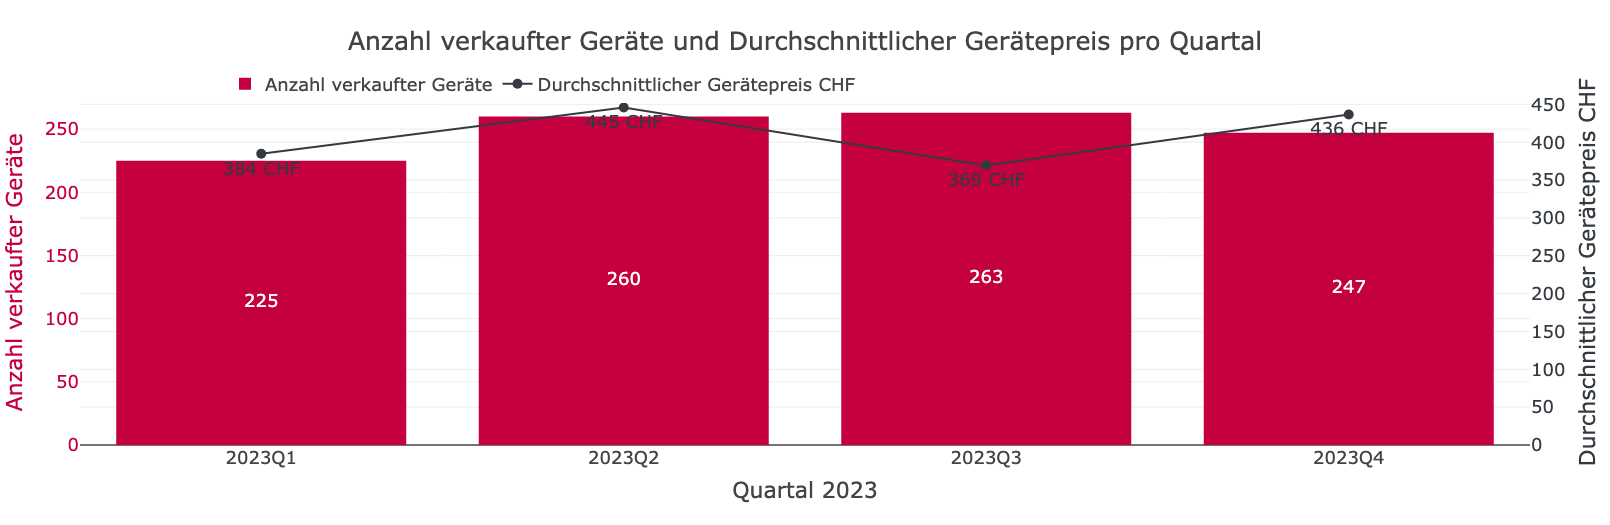

In [78]:
# Display the above graph as a png
display(Image('graph1.png'))

#### Sales and AddedSales by quarter

In [58]:
# Create a grouped bar chart
fig = go.Figure()

# Add bar trace for the Purchase Amount
fig.add_trace(go.Bar(
    x=df_quarter['Quarter'],
    y=df_quarter['PurchaseAmount'],
    name='Geräteverkauf CHF',
    marker_color='#c5003e',
    text=df_quarter['PurchaseAmount'].apply(lambda x: f'{int(x)}'),  # Add text for labels
    textposition='inside',
    textfont=dict(color='#FFF')
))

# Add bar trace for the Added Sales Amount
fig.add_trace(go.Bar(
    x=df_quarter['Quarter'],
    y=df_quarter['AddedSalesAmount'],
    name='Zusatzverkauf CHF',
    marker_color='#343a40',
    text=df_quarter['AddedSalesAmount'].apply(lambda x: f'{int(x)}'),  # Add text for labels
    textposition='inside',
    textfont=dict(color='#FFF')
))

# Create the layout with grouped bars
fig.update_layout(
    title='Geräteverkäufe und Zusatzverkäufe pro Quartal',
    xaxis=dict(title='Quartal 2023'),
    yaxis=dict(
        title='Betrag CHF',
        titlefont=dict(color='#343a40'),
        tickfont=dict(color='#343a40'),
        range=[0, max(df_quarter[['PurchaseAmount', 'AddedSalesAmount']].max()) + 10]  # Ensuring y-axis starts at 0
    ),
    barmode='group',  # Enable grouped bar mode
    legend=dict(x=0, y=1.1, orientation='h'),
    template='presentation'
)

fig.show()

In [76]:
# Upload the above graph as a png
uploaded = files.upload()

Saving graph2.png to graph2.png


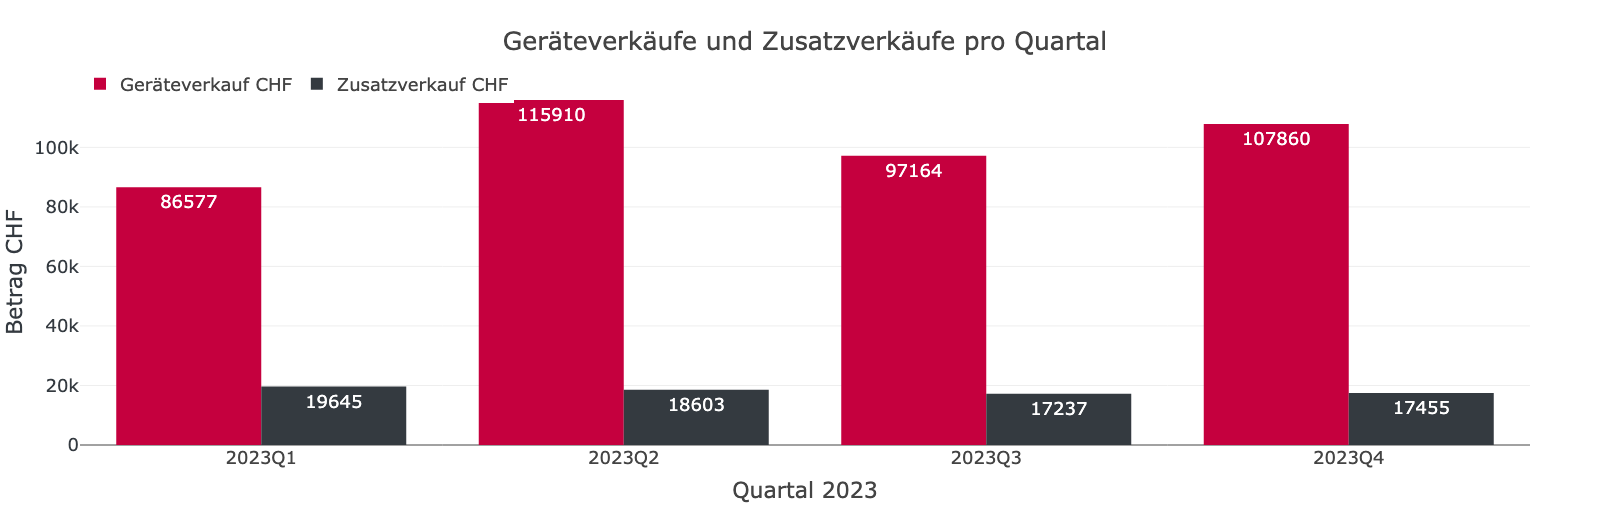

In [77]:
# Display the above graph as a png
display(Image('graph2.png'))